# Bike Demand Visualization Project

Welcome to **"Bike Demand Visualization Project"** which is a project of Data Visualization. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.

---
---

## Determines

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be done. Recognizing features, detecting missing values, outliers etc. Then reviewing the data from various angles in different time breakdowns. For example, visualizing the distribution of bike shares by day of the week. With this graph, we will be able to easily observe and make inferences how people's behavior changes daily. Likewise, we can make hourly, monthly, seasonally etc. analyzes. In addition, we can analyze correlation of variables with a heatmap.  


## Tasks

### 1.Import libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [20]:
bike = pd.read_csv("store_sharing.csv")
bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### 3.Check missing values and if there are any dublicate rows or not.

In [22]:
bike.isnull().sum().sum()

0

In [23]:
bike.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [24]:
bike.duplicated().value_counts()

False    17414
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

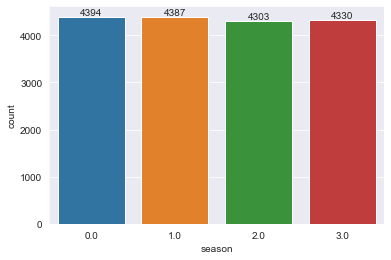

In [25]:
# season
ax = sns.countplot(x="season", data=bike)
ax.bar_label(ax.containers[0]);


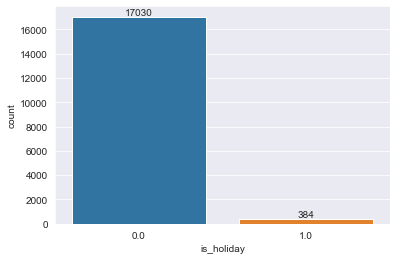

In [26]:
# is_holiday
ax = sns.countplot(x="is_holiday", data=bike)
ax.bar_label(ax.containers[0]);

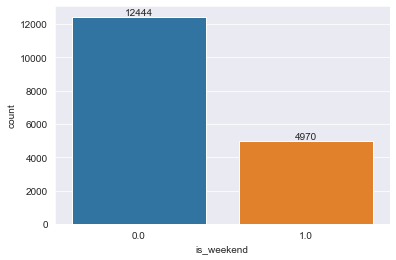

In [27]:
# is_weekend
ax = sns.countplot(x="is_weekend", data=bike)
ax.bar_label(ax.containers[0]);

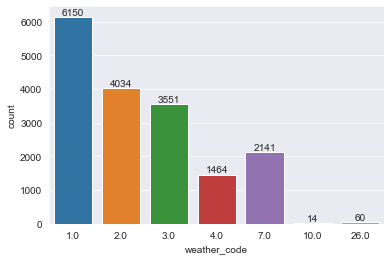

In [28]:
# weather_code
ax = sns.countplot(x="weather_code", data=bike)
ax.bar_label(ax.containers[0]);

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

### 5.Look at the data type of each variable, transform `timestamp` in datetime type.

In [29]:
bike.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [30]:
bike["timestamp"] = pd.to_datetime(bike["timestamp"])
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [31]:
bike["year_month"] = bike.timestamp.dt.strftime('%Y-%m')
bike["year"] = bike.timestamp.dt.year
bike["month"] = bike.timestamp.dt.month
bike["day_of_month"] = bike.timestamp.dt.day
bike["day_of_week"] = bike.timestamp.dt.day_of_week
bike["hour"] = bike.timestamp.dt.hour

bike.set_index("timestamp", inplace=True)

In [32]:
bike.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

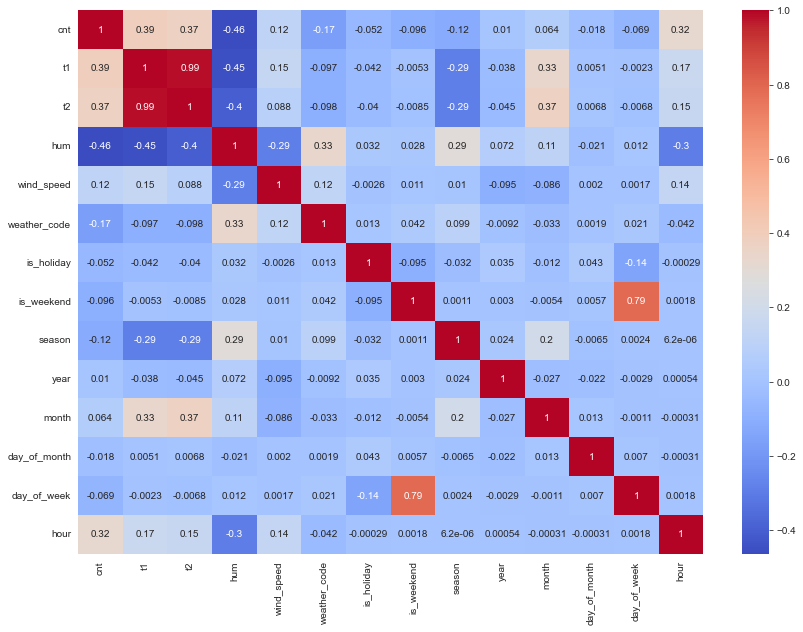

In [251]:
# for all variables
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(bike.corr(),annot=True, cmap="coolwarm")

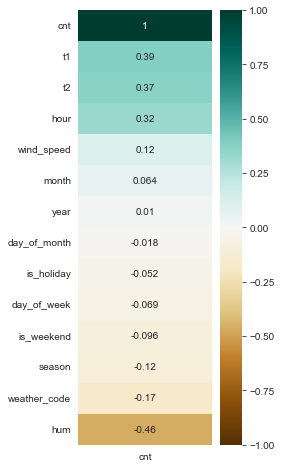

In [34]:
# for the target variable
target_vr=bike.corr()[["cnt"]]
f, ax = plt.subplots(figsize=(3, 8))
sns.heatmap(target_vr.sort_values(by="cnt",ascending=False),annot=True,cmap="BrBG",vmin=-1);

### 8. Visualize the correlation of the target variable and the other features with barplot

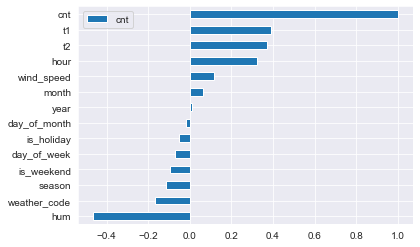

In [38]:
#with pandas
target_vr.sort_values(by="cnt").plot.barh();

### 9.Plot bike shares over time use lineplot

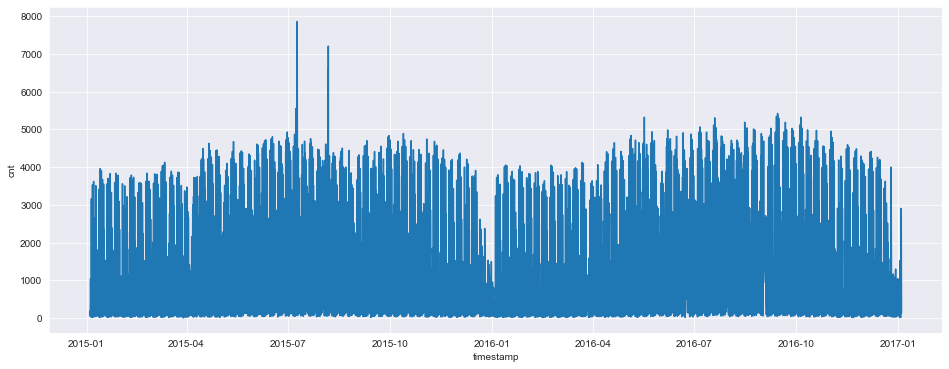

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x="timestamp", y="cnt",data=bike);

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [40]:
bike.groupby("year_month")["cnt"].sum().index

Index(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01'],
      dtype='object', name='year_month')

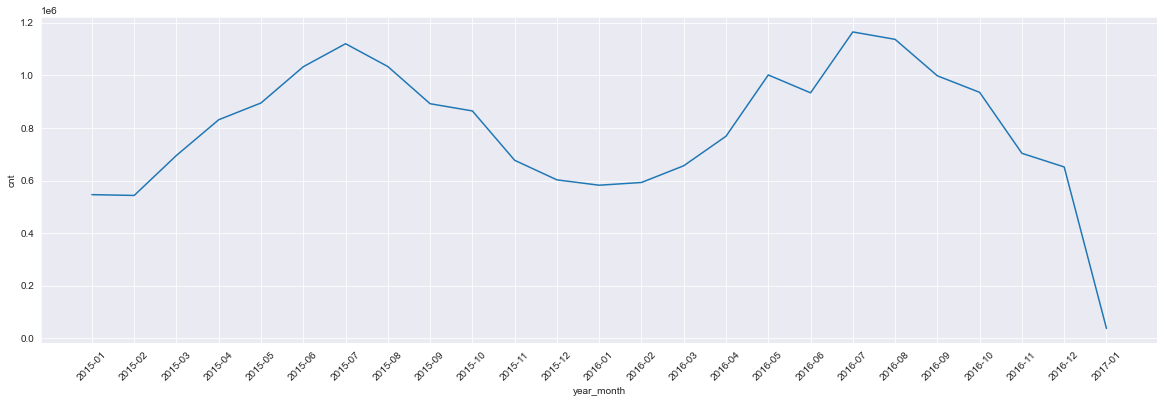

In [45]:
# with lineplot
fig, ax = plt.subplots(figsize=(20,6))
bike_year_month = bike.groupby("year_month")[["cnt"]].sum()
sns.lineplot(x="year_month", y="cnt", data=bike_year_month)
plt.xticks(rotation=45);


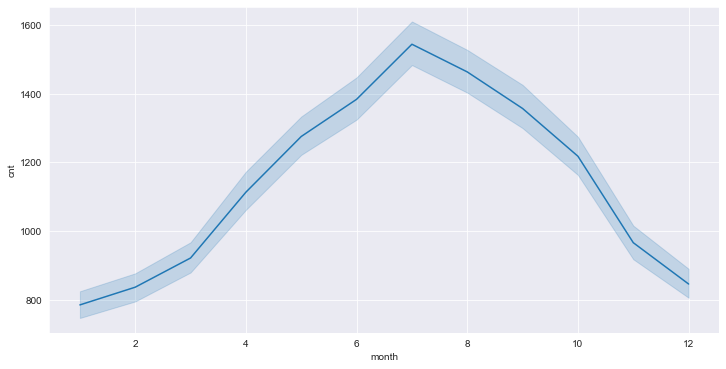

In [46]:
# with lineplot
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x="month", y="cnt", data=bike);

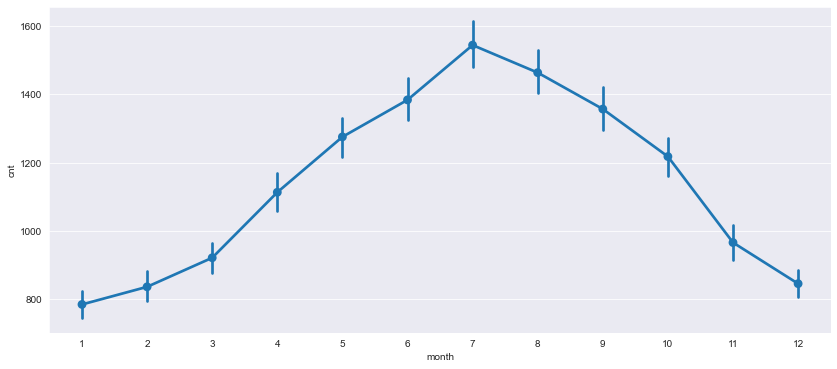

In [47]:
# with pointplot
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x="month", y="cnt", data=bike);


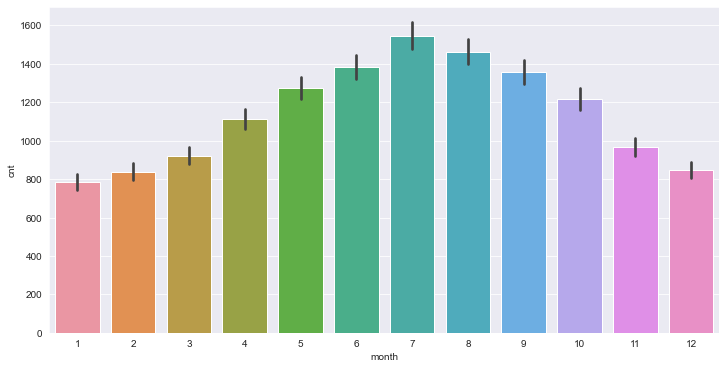

In [48]:
# with barplot
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="month", y="cnt", data=bike);

### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

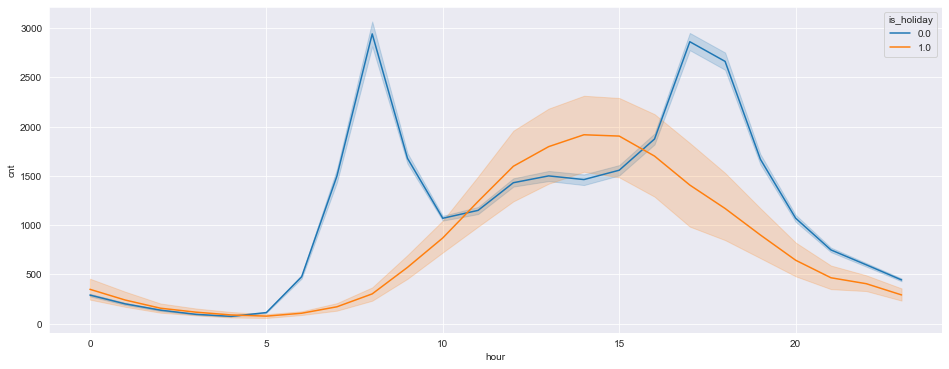

In [261]:
# with lineplot (*whether it is a holiday or not*)
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x="hour",y="cnt",hue="is_holiday",data=bike)


In working days bike is rented mostly in the morning and before evening while in holidays mostly afternoon.

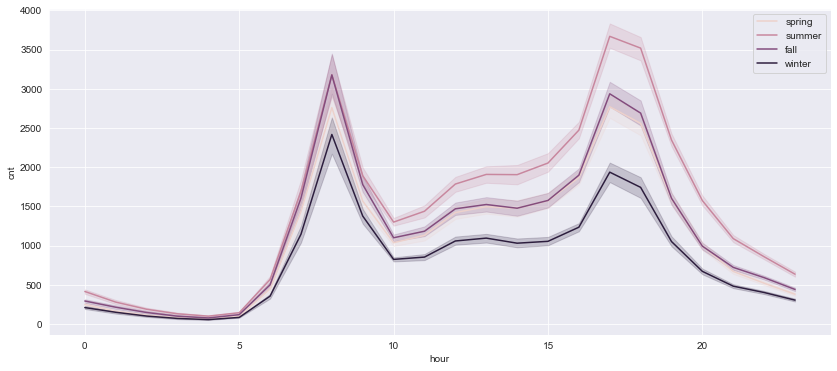

In [55]:
# with lineplot (*You may want to see seasonal breakdowns*)
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(x="hour",y="cnt",hue="season",data=bike)
plt.legend(labels=["spring","summer","fall","winter"]);

season - category field meteorological seasons: 
- 0-spring ; 
- 1-summer; 
- 2-fall; 
- 3-winter

The bike usage according to season is like summer > spring=fall > winter 



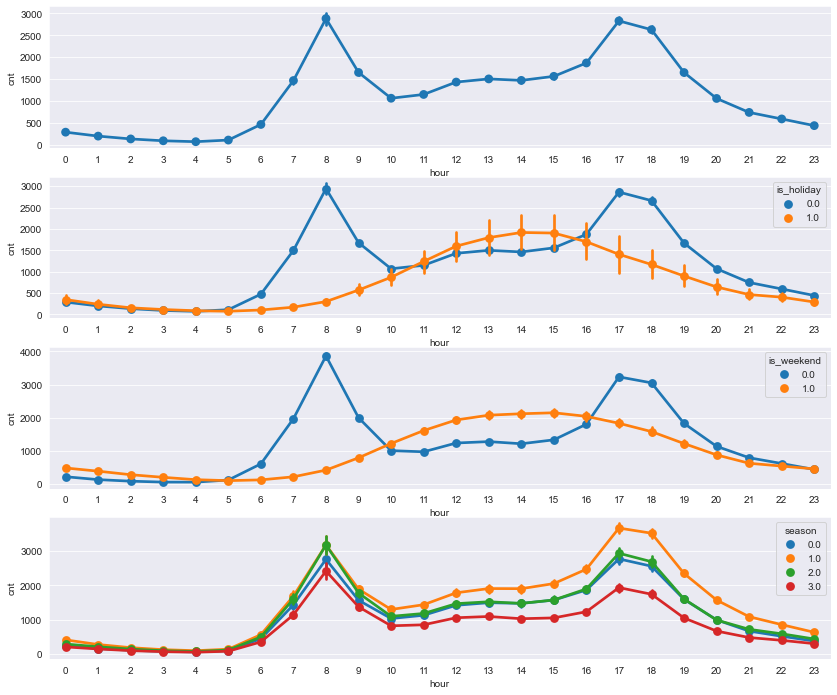

In [68]:


# with pointplot
fig, ax = plt.subplots(4,1,figsize=(14,12))
sns.pointplot(x="hour",y="cnt",data=bike,ax=ax[0])
sns.pointplot(x="hour",y="cnt",hue="is_holiday",data=bike,ax=ax[1])
sns.pointplot(x="hour",y="cnt",hue="is_weekend",data=bike,ax=ax[2])
sns.pointplot(x="hour",y="cnt",hue="season",data=bike,ax=ax[3]);


### 12.Plot bike shares by day of week

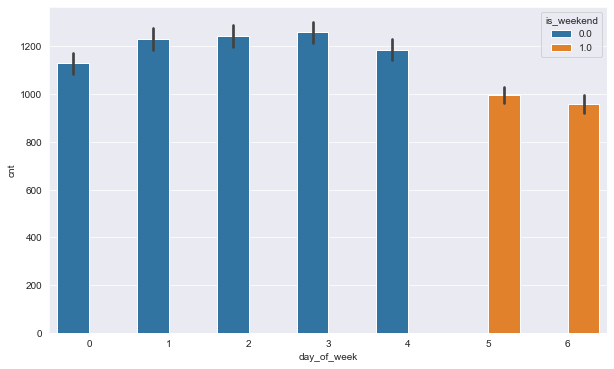

In [52]:
# with barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "day_of_week", y = "cnt", hue="is_weekend", data =bike);


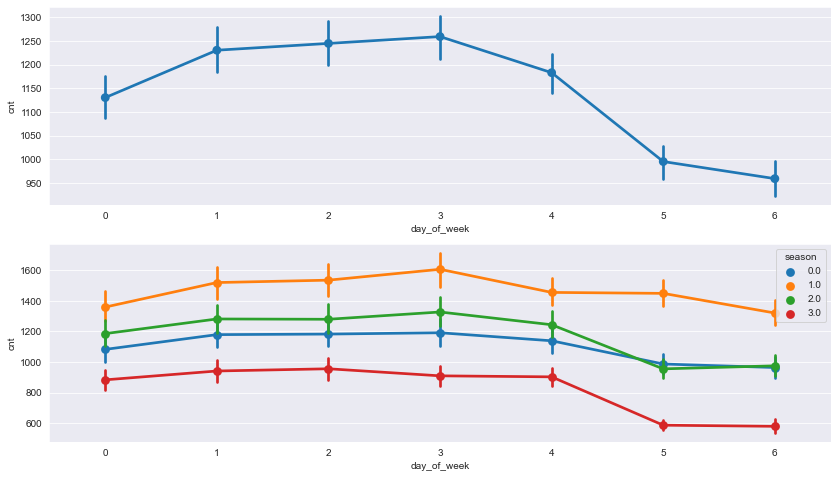

In [265]:
# with pointplot
fig, ax = plt.subplots(2,1,figsize=(14,8))
sns.pointplot(x = "day_of_week", y = "cnt", ax=ax[0], data =bike)
sns.pointplot(x = "day_of_week", y = "cnt", hue="season", ax=ax[1], data =bike);

### 13.Plot bike shares by day of month

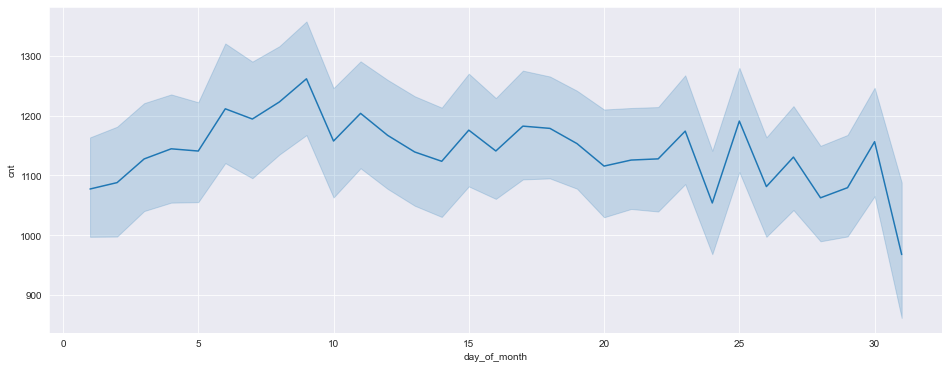

In [69]:
#with lineplot
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x = "day_of_month", y = "cnt", data =bike);


### 14.Plot bike shares by year
Bike shares on holidays by seasons

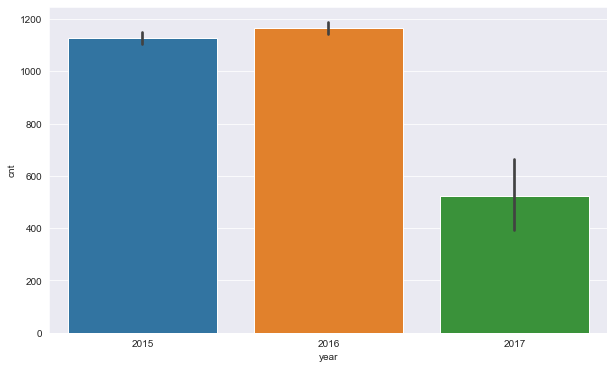

In [70]:
# with barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x="year", y="cnt", data=bike);


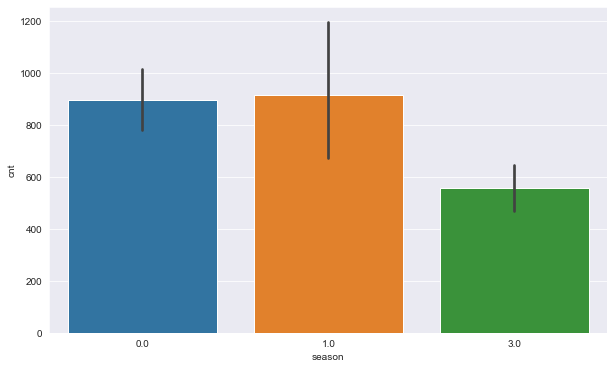

In [71]:
# with barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "season", y = "cnt", data=bike[bike.is_holiday==1]);


### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [72]:
bike_weekend = bike.is_weekend.value_counts()

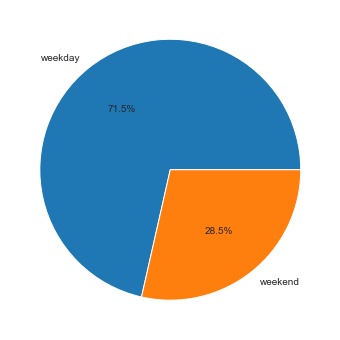

In [75]:
# pie chart
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(bike_weekend,labels=["weekday","weekend"], autopct="%.1f%%");

### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

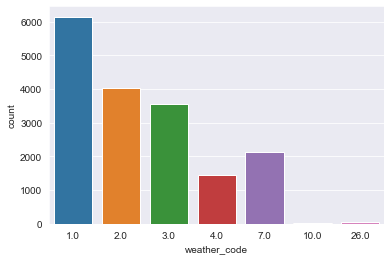

In [272]:
# with countplot
sns.countplot(x="weather_code", data=bike)

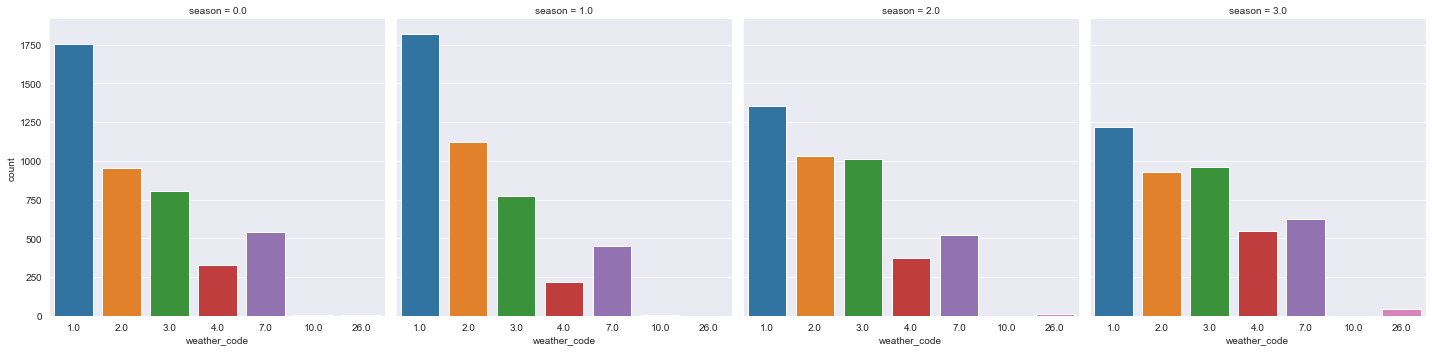

In [77]:
# with catplot
sns.catplot(x="weather_code",col="season", data=bike, kind="count");


- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

## Conclusion

Above analysis is concluded as:
- Bikes are rented less in holiday and weekends.
- In working days bike is rented mostly in the morning and before evening while in holidays mostly afternoon.
- Bad weather also affects bike rentals. 
- In warm days bike rentals are increased.
- The bike usage according to season is like summer > spring=fall > winter 

So weater condition and workday status are very important for bike rentals